In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
#importing the dataset

In [2]:
bank_data=pd.read_csv("bank_marketing .csv")

In [3]:
bank_data.head()

,age,job,marital,education,credit,balance,housing,loan,day,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,5,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,5,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,76,1,-1,0,no
3,47,blue-collar,married,unknown,no,1506,yes,no,5,92,1,-1,0,no
4,33,unknown,single,unknown,no,1,no,no,5,198,1,-1,0,no


In [4]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   credit     45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   day        45211 non-null  int64 
 9   duration   45211 non-null  int64 
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  y          45211 non-null  object
dtypes: int64(7), object(7)
memory usage: 4.8+ MB


In [6]:
bank_data.iloc[:,0].isnull().values.any()

False

In [7]:
bank_data.iloc[:,1].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [8]:
(bank_data.iloc[:,1].value_counts()/len(bank_data))*100

blue-collar      21.525735
management       20.919688
technician       16.803433
admin.           11.437482
services          9.188029
retired           5.007631
self-employed     3.492513
entrepreneur      3.289023
unemployed        2.882042
housemaid         2.742695
student           2.074716
unknown           0.637013
Name: job, dtype: float64

In [9]:
bank_data = bank_data.drop(bank_data[bank_data.job =='unknown'].index)

In [10]:
bank_data.iloc[:,1].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: job, dtype: int64

In [11]:
bank_data.iloc[:,2].value_counts()

married     27011
single      12722
divorced     5190
Name: marital, dtype: int64

In [12]:
bank_data.iloc[:,3].value_counts()

secondary    23131
tertiary     13262
primary       6800
unknown       1730
Name: education, dtype: int64

In [13]:
(bank_data.iloc[:,3].value_counts()/len(bank_data))*100

secondary    51.490328
tertiary     29.521626
primary      15.137012
unknown       3.851034
Name: education, dtype: float64

In [14]:
bank_data = bank_data.drop(bank_data[bank_data.education=='unknown'].index)

In [15]:
bank_data.iloc[:,3].value_counts()

secondary    23131
tertiary     13262
primary       6800
Name: education, dtype: int64

In [16]:
bank_data.iloc[:,4].value_counts()

no     42411
yes      782
Name: credit, dtype: int64

In [17]:
bank_data.iloc[:,5].isnull().values.any()

False

In [18]:
bank_data.iloc[:,6].value_counts()

yes    24292
no     18901
Name: housing, dtype: int64

In [19]:
bank_data.iloc[:,7].isnull().values.any()

False

In [20]:
bank_data.iloc[:,8].isnull().values.any()

False

In [21]:
bank_data.iloc[:,9].isnull().values.any()

False

In [22]:
bank_data.iloc[:,10].isnull().values.any()

False

In [23]:
bank_data.iloc[:,11].isnull().values.any()

False

In [24]:
bank_data.iloc[:,12].isnull().values.any()

False

In [25]:
bank_data.iloc[:,13].value_counts()

no     38172
yes     5021
Name: y, dtype: int64

In [26]:
bank_data['credit']=bank_data['credit'].replace(['yes','no'],['credit_yes','credit_no'])



In [27]:
bank_data['housing']=bank_data['housing'].replace(['yes','no'],['housing_yes','housing_no'])


In [28]:
bank_data['loan']=bank_data['loan'].replace(['yes','no'],['loan_yes','loan_no'])

In [29]:
bank_data

,age,job,marital,education,credit,balance,housing,loan,day,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,credit_no,2143,housing_yes,loan_no,5,261,1,-1,0,no
1,44,technician,single,secondary,credit_no,29,housing_yes,loan_no,5,151,1,-1,0,no
2,33,entrepreneur,married,secondary,credit_no,2,housing_yes,loan_yes,5,76,1,-1,0,no
5,35,management,married,tertiary,credit_no,231,housing_yes,loan_no,5,139,1,-1,0,no
6,28,management,single,tertiary,credit_no,447,housing_yes,loan_yes,5,217,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,credit_no,825,housing_no,loan_no,17,977,3,-1,0,yes
45207,71,retired,divorced,primary,credit_no,1729,housing_no,loan_no,17,456,2,-1,0,yes
45208,72,retired,married,secondary,credit_no,5715,housing_no,loan_no,17,1127,5,184,3,yes
45209,57,blue-collar,married,secondary,credit_no,668,housing_no,loan_no,17,508,4,-1,0,no


In [30]:
bankdata = bank_data.reset_index(drop = True)       
print(bankdata)  

       age           job   marital  education     credit  balance  \
0       58    management   married   tertiary  credit_no     2143   
1       44    technician    single  secondary  credit_no       29   
2       33  entrepreneur   married  secondary  credit_no        2   
3       35    management   married   tertiary  credit_no      231   
4       28    management    single   tertiary  credit_no      447   
...    ...           ...       ...        ...        ...      ...   
43188   51    technician   married   tertiary  credit_no      825   
43189   71       retired  divorced    primary  credit_no     1729   
43190   72       retired   married  secondary  credit_no     5715   
43191   57   blue-collar   married  secondary  credit_no      668   
43192   37  entrepreneur   married  secondary  credit_no     2971   

           housing      loan  day  duration  campaign  pdays  previous    y  
0      housing_yes   loan_no    5       261         1     -1         0   no  
1      housing_

In [31]:
bankdata.head()

,age,job,marital,education,credit,balance,housing,loan,day,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,credit_no,2143,housing_yes,loan_no,5,261,1,-1,0,no
1,44,technician,single,secondary,credit_no,29,housing_yes,loan_no,5,151,1,-1,0,no
2,33,entrepreneur,married,secondary,credit_no,2,housing_yes,loan_yes,5,76,1,-1,0,no
3,35,management,married,tertiary,credit_no,231,housing_yes,loan_no,5,139,1,-1,0,no
4,28,management,single,tertiary,credit_no,447,housing_yes,loan_yes,5,217,1,-1,0,no


In [32]:
bankdata.tail()

,age,job,marital,education,credit,balance,housing,loan,day,duration,campaign,pdays,previous,y
43188,51,technician,married,tertiary,credit_no,825,housing_no,loan_no,17,977,3,-1,0,yes
43189,71,retired,divorced,primary,credit_no,1729,housing_no,loan_no,17,456,2,-1,0,yes
43190,72,retired,married,secondary,credit_no,5715,housing_no,loan_no,17,1127,5,184,3,yes
43191,57,blue-collar,married,secondary,credit_no,668,housing_no,loan_no,17,508,4,-1,0,no
43192,37,entrepreneur,married,secondary,credit_no,2971,housing_no,loan_no,17,361,2,188,11,no


In [33]:
from sklearn import preprocessing

In [34]:
enc=preprocessing.OneHotEncoder(drop='first')
enc.fit_transform(bankdata[['job','marital','education','credit','housing','loan','y']]).toarray()

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [35]:
enc.categories_

[array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
        'retired', 'self-employed', 'services', 'student', 'technician',
        'unemployed'], dtype=object),
 array(['divorced', 'married', 'single'], dtype=object),
 array(['primary', 'secondary', 'tertiary'], dtype=object),
 array(['credit_no', 'credit_yes'], dtype=object),
 array(['housing_no', 'housing_yes'], dtype=object),
 array(['loan_no', 'loan_yes'], dtype=object),
 array(['no', 'yes'], dtype=object)]

In [36]:
enc=preprocessing.OrdinalEncoder()

In [37]:
bankdata['y']=enc.fit_transform(bankdata['y'].values.reshape(-1,1))

In [38]:
enc=preprocessing.OneHotEncoder(drop='first')

In [39]:
onehots=enc.fit_transform(bankdata[['job','marital','education','credit','housing','loan']]).toarray()

In [40]:
cols=[]

In [41]:
for i in enc.categories_:
    i=np.delete(i,0)
    cols.extend(i)

In [42]:
bankdata=bankdata.join(pd.DataFrame(onehots,columns=cols))

In [43]:
bankdata=bankdata.drop(['job','marital','education','credit','housing','loan'],axis=1)

In [44]:
pd.set_option("display.max_columns", None)

In [45]:
bankdata

,age,balance,day,duration,campaign,pdays,previous,y,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,married,single,secondary,tertiary,credit_yes,housing_yes,loan_yes
0,58,2143,5,261,1,-1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,44,29,5,151,1,-1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,33,2,5,76,1,-1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
3,35,231,5,139,1,-1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,28,447,5,217,1,-1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43188,51,825,17,977,3,-1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
43189,71,1729,17,456,2,-1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43190,72,5715,17,1127,5,184,3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
43191,57,668,17,508,4,-1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [46]:
bankdata.describe(include='all')

,age,balance,day,duration,campaign,pdays,previous,y,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,married,single,secondary,tertiary,credit_yes,housing_yes,loan_yes
count,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000
mean,40.764082,1354.027342,15.809414,258.323409,2.758178,40.404070,0.584863,0.116246,0.214803,0.032667,0.027667,0.213368,0.049661,0.035654,0.092700,0.017943,0.170282,0.029496,0.600699,0.282893,0.535527,0.307040,0.018105,0.562406,0.164541
std,10.512640,3042.103625,8.305970,258.162006,3.063987,100.420624,2.332672,0.320523,0.410691,0.177766,0.164017,0.409690,0.217246,0.185428,0.290015,0.132745,0.375885,0.169193,0.489760,0.450410,0.498742,0.461272,0.133332,0.496096,0.370770
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,71.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,442.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,48.000000,1412.000000,21.000000,318.000000,3.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,58.000000,871.000000,275.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
bankdata.y.value_counts()

0.0    38172
1.0     5021
Name: y, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


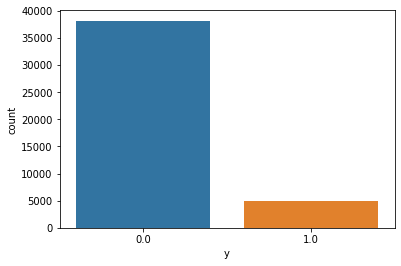

In [48]:
sns.countplot(bankdata['y'])

In [49]:
bankdata

,age,balance,day,duration,campaign,pdays,previous,y,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,married,single,secondary,tertiary,credit_yes,housing_yes,loan_yes
0,58,2143,5,261,1,-1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,44,29,5,151,1,-1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,33,2,5,76,1,-1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
3,35,231,5,139,1,-1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,28,447,5,217,1,-1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43188,51,825,17,977,3,-1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
43189,71,1729,17,456,2,-1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43190,72,5715,17,1127,5,184,3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
43191,57,668,17,508,4,-1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [50]:
X=bankdata.drop('y',axis=1)
y = bankdata['y'] 

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, stratify=y, random_state=99)

In [52]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [53]:
model = tf.keras.models.Sequential()

In [54]:
model.add(tf.keras.layers.Dense(8,activation='relu',input_shape=(24,)))
model.add(tf.keras.layers.Dense(3,activation='softmax'))

In [55]:

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')


In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 3)                 27        
                                                                 
Total params: 227
Trainable params: 227
Non-trainable params: 0
_________________________________________________________________


In [57]:
class_weights = {0:1,1:8}

history = model.fit(X_train, y_train, \
                  batch_size = 8, epochs= 5, \
                  verbose=2, class_weight=class_weights, \
                  validation_split=0.2) 


Epoch 1/5
3456/3456 - 10s - loss: 0.9510 - accuracy: 0.7711 - val_loss: 0.4990 - val_accuracy: 0.7766 - 10s/epoch - 3ms/step
Epoch 2/5
3456/3456 - 8s - loss: 0.8122 - accuracy: 0.7824 - val_loss: 0.4454 - val_accuracy: 0.7911 - 8s/epoch - 2ms/step
Epoch 3/5
3456/3456 - 8s - loss: 0.7958 - accuracy: 0.7802 - val_loss: 0.4477 - val_accuracy: 0.7854 - 8s/epoch - 2ms/step
Epoch 4/5
3456/3456 - 8s - loss: 0.7874 - accuracy: 0.7788 - val_loss: 0.4365 - val_accuracy: 0.7860 - 8s/epoch - 2ms/step
Epoch 5/5
3456/3456 - 9s - loss: 0.7834 - accuracy: 0.7774 - val_loss: 0.4664 - val_accuracy: 0.7724 - 9s/epoch - 3ms/step


In [58]:
accuracy=history.history['accuracy']
validation_accuracy=history.history['val_accuracy']

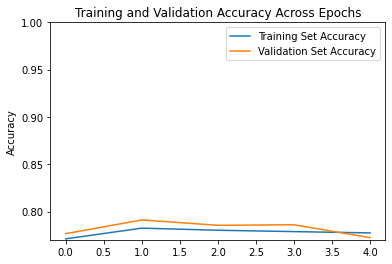

In [59]:
accuracy=history.history['accuracy']
validation_accuracy=history.history['val_accuracy']
plt.plot(accuracy,label='Training Set Accuracy')
plt.plot(validation_accuracy,label='Validation Set Accuracy')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

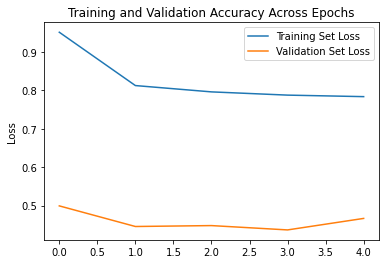

In [60]:
loss=history.history['loss']
validation_loss=history.history['val_loss']

plt.plot(loss,label='Training Set Loss')
plt.plot(validation_loss,label='Validation Set Loss')
plt.ylabel('Loss')

plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

In [61]:
from sklearn.metrics import confusion_matrix,classification_report

In [62]:
y_pred=model.predict(X_test)
y_pred=y_pred.argmax(axis=1)

270/270 [==============================] - 0s 1ms/step


In [63]:
confusion_matrix=confusion_matrix(y_test,y_pred)



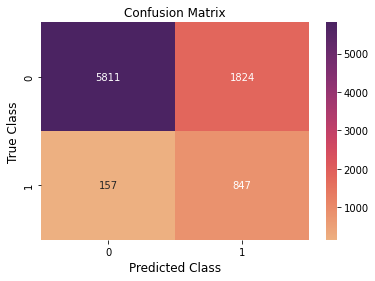

In [64]:
ax=sns.heatmap(confusion_matrix,cmap='flare',annot=True,fmt='d')

plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12)
plt.show()

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.76      0.85      7635
         1.0       0.32      0.84      0.46      1004

    accuracy                           0.77      8639
   macro avg       0.65      0.80      0.66      8639
weighted avg       0.90      0.77      0.81      8639



In [67]:
#*************************************************************************

In [68]:
#SMOTE INSTEAD OF WEIGHTS

In [66]:
X=bankdata.drop('y',axis=1)
y = bankdata['y'] 

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, stratify=y, random_state=99)

In [68]:
from imblearn.over_sampling import SMOTE

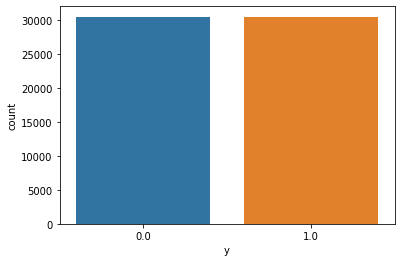

In [69]:
resampler=SMOTE(random_state=0)
X_train_smote,y_train_smote=resampler.fit_resample(X_train,y_train)
sns.countplot(x=y_train_smote)

In [70]:
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)

In [71]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')

In [72]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 3)                 27        
                                                                 
Total params: 227
Trainable params: 227
Non-trainable params: 0
_________________________________________________________________


In [73]:
history = model.fit(X_train_smote, y_train_smote, \
                  batch_size = 8, epochs= 5, \
                  verbose=2, \
                  validation_split=0.2) 

Epoch 1/5
6108/6108 - 14s - loss: 0.3913 - accuracy: 0.8219 - val_loss: 0.4906 - val_accuracy: 0.7739 - 14s/epoch - 2ms/step
Epoch 2/5
6108/6108 - 13s - loss: 0.3752 - accuracy: 0.8312 - val_loss: 0.4657 - val_accuracy: 0.7883 - 13s/epoch - 2ms/step
Epoch 3/5
6108/6108 - 13s - loss: 0.3632 - accuracy: 0.8384 - val_loss: 0.4587 - val_accuracy: 0.7867 - 13s/epoch - 2ms/step
Epoch 4/5
6108/6108 - 13s - loss: 0.3523 - accuracy: 0.8438 - val_loss: 0.4531 - val_accuracy: 0.7890 - 13s/epoch - 2ms/step
Epoch 5/5
6108/6108 - 13s - loss: 0.3435 - accuracy: 0.8489 - val_loss: 0.4316 - val_accuracy: 0.8002 - 13s/epoch - 2ms/step


In [74]:
accuracy=history.history['accuracy']
validation_accuracy=history.history['val_accuracy']

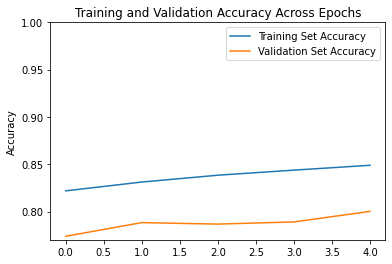

In [75]:
accuracy=history.history['accuracy']
validation_accuracy=history.history['val_accuracy']
plt.plot(accuracy,label='Training Set Accuracy')
plt.plot(validation_accuracy,label='Validation Set Accuracy')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

Text(0, 0.5, 'Loss')

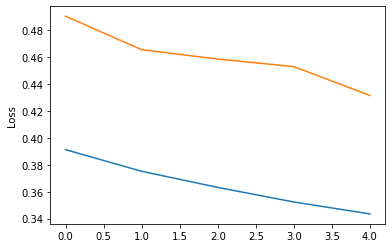

In [76]:
loss=history.history['loss']
validation_loss=history.history['val_loss']

plt.plot(loss,label='Training Set Loss')
plt.plot(validation_loss,label='Validation Set Loss')
plt.ylabel('Loss')

In [77]:
from sklearn.metrics import confusion_matrix,classification_report

In [78]:
y_pred=model.predict(X_test)
y_pred=y_pred.argmax(axis=1)

270/270 [==============================] - 0s 1ms/step


In [79]:
confusion_matrix=confusion_matrix(y_test,y_pred)

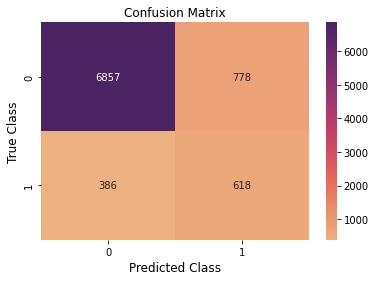

In [80]:
ax=sns.heatmap(confusion_matrix,cmap='flare',annot=True,fmt='d')

plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12)
plt.show()

In [81]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.90      0.92      7635
         1.0       0.44      0.62      0.52      1004

    accuracy                           0.87      8639
   macro avg       0.69      0.76      0.72      8639
weighted avg       0.89      0.87      0.87      8639

